In [1]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install qiskit qiskit-aer

Note: you may need to restart the kernel to use updated packages.


Measurement Results: {'1101': 2000}
Most frequent output (secret string): 1101


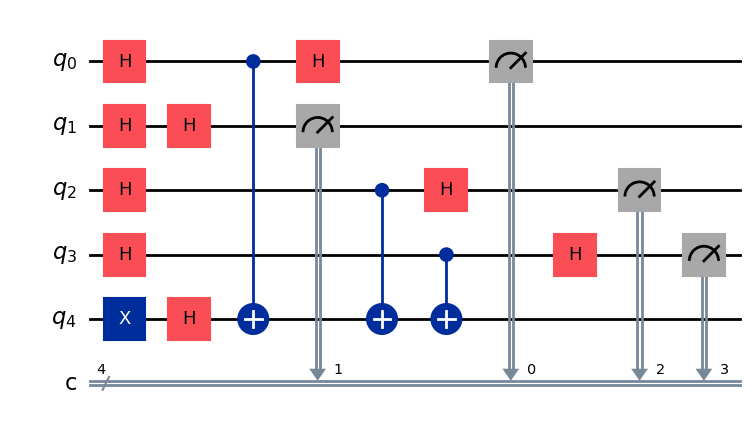

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

s = '1101'
n = len(s)

bv = QuantumCircuit(n + 1, n)

bv.x(n)
bv.h(n)

bv.h(range(n))

for i, bit in enumerate(reversed(s)):
    if bit == '1':
        bv.cx(i, n) 
        
bv.h(range(n))

bv.measure(range(n), range(n))

simulator = Aer.get_backend('aer_simulator')
bv_compiled = transpile(bv, simulator)
job = simulator.run(bv_compiled, shots=2000)
result = job.result()
counts = result.get_counts()

print(f"Measurement Results: {counts}")

most_frequent = max(counts, key=counts.get)
print(f"Most frequent output (secret string): {most_frequent}")
bv.draw('mpl') 
